In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from plotly import graph_objs as go

In [56]:
START = "2018-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

period = 1 * 365
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data('BBRI.JK')
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
1484,2023-12-18,5575.0,5575.0,5500.0,5500.0,5500.0,102780900
1485,2023-12-19,5450.0,5550.0,5450.0,5550.0,5550.0,135207300
1486,2023-12-20,5700.0,5700.0,5550.0,5550.0,5550.0,138470900
1487,2023-12-21,5550.0,5600.0,5525.0,5575.0,5575.0,99049600
1488,2023-12-22,5650.0,5700.0,5600.0,5675.0,5675.0,109411300


In [57]:
data = data.reset_index()
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2018-01-01,3640.0,3640.0,3640.0,3640.0,2935.489502,0
1,1,2018-01-02,3690.0,3720.0,3610.0,3630.0,2927.424805,91127100
2,2,2018-01-03,3630.0,3630.0,3560.0,3610.0,2911.295654,70148700
3,3,2018-01-04,3610.0,3610.0,3460.0,3550.0,2862.908691,156406300
4,4,2018-01-05,3550.0,3590.0,3520.0,3590.0,2895.166748,87095600


In [58]:
data = data.drop( ['Date', 'Adj Close'], axis=1)
data.head()

,index,Open,High,Low,Close,Volume
0,0,3640.0,3640.0,3640.0,3640.0,0
1,1,3690.0,3720.0,3610.0,3630.0,91127100
2,2,3630.0,3630.0,3560.0,3610.0,70148700
3,3,3610.0,3610.0,3460.0,3550.0,156406300
4,4,3550.0,3590.0,3520.0,3590.0,87095600


Text(0, 0.5, 'Close Price Rupiah (Rp)')

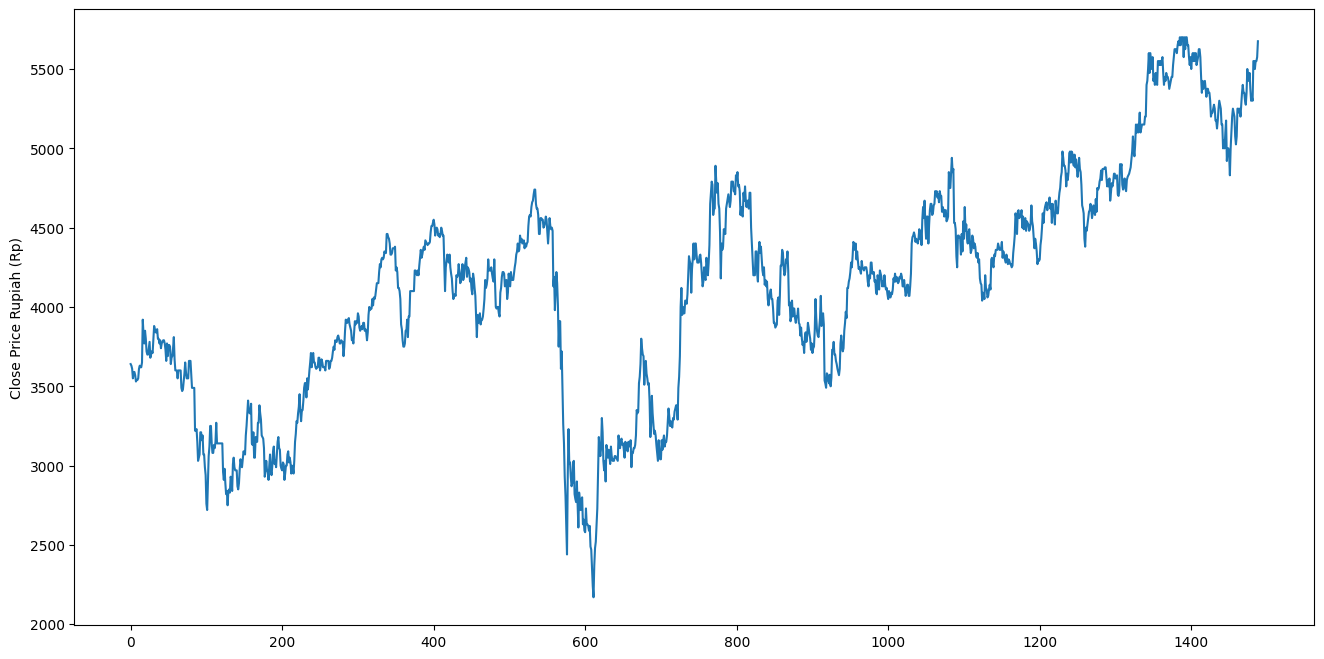

In [59]:
plt.figure(figsize=(16,8))
plt.plot(data.Close)
plt.ylabel('Close Price Rupiah (Rp)')

In [60]:
data

,index,Open,High,Low,Close,Volume
0,0,3640.0,3640.0,3640.0,3640.0,0
1,1,3690.0,3720.0,3610.0,3630.0,91127100
2,2,3630.0,3630.0,3560.0,3610.0,70148700
3,3,3610.0,3610.0,3460.0,3550.0,156406300
4,4,3550.0,3590.0,3520.0,3590.0,87095600
...,...,...,...,...,...,...
1484,1484,5575.0,5575.0,5500.0,5500.0,102780900
1485,1485,5450.0,5550.0,5450.0,5550.0,135207300
1486,1486,5700.0,5700.0,5550.0,5550.0,138470900
1487,1487,5550.0,5600.0,5525.0,5575.0,99049600


In [61]:
ma100 = data.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1484    5352.60
1485    5351.10
1486    5350.10
1487    5348.85
1488    5348.60
Name: Close, Length: 1489, dtype: float64

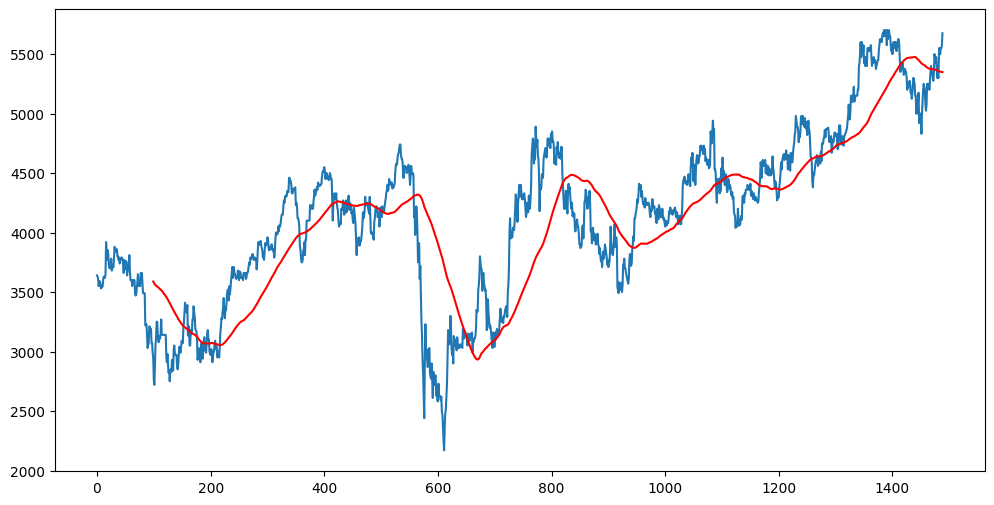

In [62]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

In [63]:
ma200 = data.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1484    5261.975
1485    5265.375
1486    5268.725
1487    5272.200
1488    5276.475
Name: Close, Length: 1489, dtype: float64

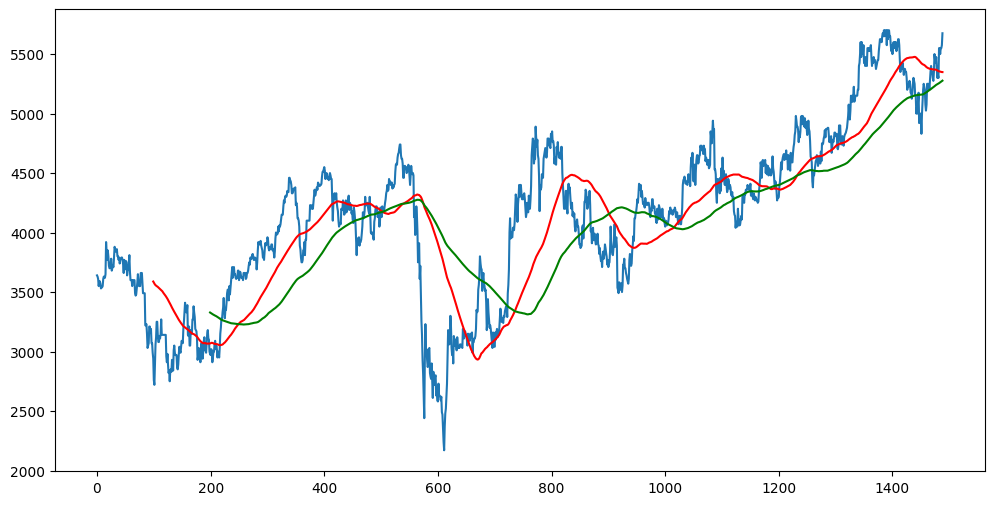

In [64]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [65]:
data.shape

(1489, 6)

In [66]:
#Split data into training and testing

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

print(data_training.shape)
print(data_testing.shape)

(1042, 1)
(447, 1)


In [67]:
data_training.head()

,Close
0,3640.0
1,3630.0
2,3610.0
3,3550.0
4,3590.0


In [68]:
data_testing.head()

,Close
1042,4430.0
1043,4480.0
1044,4390.0
1045,4550.0
1046,4630.0


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.54044118],
       [0.53676471],
       [0.52941176],
       ...,
       [0.81985294],
       [0.83088235],
       [0.85294118]])

In [71]:
data_training_array.shape

(1042, 1)

In [72]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i, :])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
x_train.shape

(942, 100, 1)

In [74]:
#MODEL
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [75]:
model = Sequential()
model.add(LSTM(units= 50 ,activation= 'relu', return_sequences= True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0, 2))

model.add(LSTM(units= 60 ,activation= 'relu', return_sequences= True))
model.add(Dropout(0, 3))

model.add(LSTM(units= 80 ,activation= 'relu', return_sequences= True))
model.add(Dropout(0, 4))

model.add(LSTM(units= 120 ,activation= 'relu'))
model.add(Dropout(0, 5))

model.add(Dense(units=1))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [77]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs= 50)

Epoch 1/50


30/30 [==============================] - 7s 103ms/step - loss: 0.1434 - accuracy: 0.0011
Epoch 2/50
30/30 [==============================] - 3s 110ms/step - loss: 0.0191 - accuracy: 0.0021
Epoch 3/50
30/30 [==============================] - 3s 108ms/step - loss: 0.0123 - accuracy: 0.0021
Epoch 4/50
30/30 [==============================] - 4s 118ms/step - loss: 0.0105 - accuracy: 0.0021
Epoch 5/50
30/30 [==============================] - 4s 117ms/step - loss: 0.0093 - accuracy: 0.0021
Epoch 6/50
30/30 [==============================] - 3s 115ms/step - loss: 0.0090 - accuracy: 0.0021
Epoch 7/50
30/30 [==============================] - 4s 121ms/step - loss: 0.0080 - accuracy: 0.0021
Epoch 8/50
30/30 [==============================] - 4s 127ms/step - loss: 0.0067 - accuracy: 0.0021
Epoch 9/50
30/30 [==============================] - 3s 114ms/step - loss: 0.0062 - accuracy: 0.0021
Epoch 10/50
30/30 [==============================] - 4s 119ms/step - loss: 0.0058 - accuracy: 0.0021
Epoch 11/5

In [78]:
model.save('keras_model.h5')

c:\Users\SATYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
data_testing.head()

,Close
1042,4430.0
1043,4480.0
1044,4390.0
1045,4550.0
1046,4630.0


In [80]:
data_training.tail(100)

,Close
942,3850.0
943,3900.0
944,3970.0
945,3930.0
946,4120.0
...,...
1037,4430.0
1038,4420.0
1039,4400.0
1040,4430.0


In [81]:
past_100_days = data_training.tail(100)

In [82]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [83]:
final_df.head()

,Close
0,3850.0
1,3900.0
2,3970.0
3,3930.0
4,4120.0


In [84]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.02702703],
       [0.06486486],
       [0.04324324],
       [0.14594595],
       [0.14594595],
       [0.16756757],
       [0.17837838],
       [0.2       ],
       [0.23243243],
       [0.21621622],
       [0.25405405],
       [0.3027027 ],
       [0.2972973 ],
       [0.27567568],
       [0.2972973 ],
       [0.24324324],
       [0.27027027],
       [0.23783784],
       [0.21081081],
       [0.21621622],
       [0.20540541],
       [0.19459459],
       [0.23783784],
       [0.21621622],
       [0.21081081],
       [0.20540541],
       [0.21621622],
       [0.21621622],
       [0.21621622],
       [0.2       ],
       [0.16756757],
       [0.15135135],
       [0.18918919],
       [0.17837838],
       [0.23243243],
       [0.23243243],
       [0.19459459],
       [0.19459459],
       [0.2       ],
       [0.16756757],
       [0.17297297],
       [0.12972973],
       [0.12432432],
       [0.18918919],
       [0.17297297],
       [0.14054054],
       [0.205

In [85]:
input_data.shape

(547, 1)

In [86]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i, :])
    y_test.append(input_data[i, 0])

In [87]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(447, 100, 1)
(447,)


In [88]:
# prediction

y_predicted = model.predict(x_test)

y_predicted.shape

14/14 [==============================] - 1s 47ms/step


(447, 1)

In [89]:
y_test

array([0.31351351, 0.34054054, 0.29189189, 0.37837838, 0.42162162,
       0.38378378, 0.44324324, 0.36216216, 0.31351351, 0.38918919,
       0.38918919, 0.2972973 , 0.36216216, 0.41081081, 0.43243243,
       0.43243243, 0.39459459, 0.4       , 0.42702703, 0.43243243,
       0.47567568, 0.46486486, 0.47567568, 0.45405405, 0.46486486,
       0.43783784, 0.47567568, 0.45945946, 0.45945946, 0.40540541,
       0.42162162, 0.41081081, 0.38918919, 0.41081081, 0.41081081,
       0.37297297, 0.37837838, 0.38918919, 0.54054054, 0.51351351,
       0.48648649, 0.53513514, 0.58918919, 0.54054054, 0.55135135,
       0.36756757, 0.36756757, 0.34594595, 0.25405405, 0.21621622,
       0.32432432, 0.32432432, 0.31891892, 0.31351351, 0.25945946,
       0.32972973, 0.27027027, 0.37297297, 0.31351351, 0.42162162,
       0.34054054, 0.36216216, 0.31351351, 0.2972973 , 0.33513514,
       0.34594595, 0.2972973 , 0.26486486, 0.27567568, 0.32432432,
       0.31351351, 0.28108108, 0.2972973 , 0.28648649, 0.25405

In [90]:
y_predicted

array([[0.26168546],
       [0.27296266],
       [0.29099613],
       [0.30229807],
       [0.31164953],
       [0.3301767 ],
       [0.35435492],
       [0.3835365 ],
       [0.39998734],
       [0.38724056],
       [0.36226144],
       [0.34681404],
       [0.33595076],
       [0.33209032],
       [0.34290951],
       [0.36959508],
       [0.40243477],
       [0.42207295],
       [0.42078656],
       [0.41022262],
       [0.4054435 ],
       [0.4192516 ],
       [0.4450714 ],
       [0.46913558],
       [0.4768429 ],
       [0.46943125],
       [0.453083  ],
       [0.44509766],
       [0.44902366],
       [0.45803267],
       [0.45342776],
       [0.4354923 ],
       [0.41393942],
       [0.39469558],
       [0.38542554],
       [0.38651767],
       [0.38537773],
       [0.37710458],
       [0.3672521 ],
       [0.3899217 ],
       [0.44359237],
       [0.4960934 ],
       [0.5278316 ],
       [0.5434355 ],
       [0.54861164],
       [0.54962176],
       [0.5130678 ],
       [0.445

In [91]:
scaler.scale_

array([0.00054054])

In [92]:
sclae_factor = 1/0.000369
y_predicted = y_predicted * sclae_factor
y_test = y_test * sclae_factor

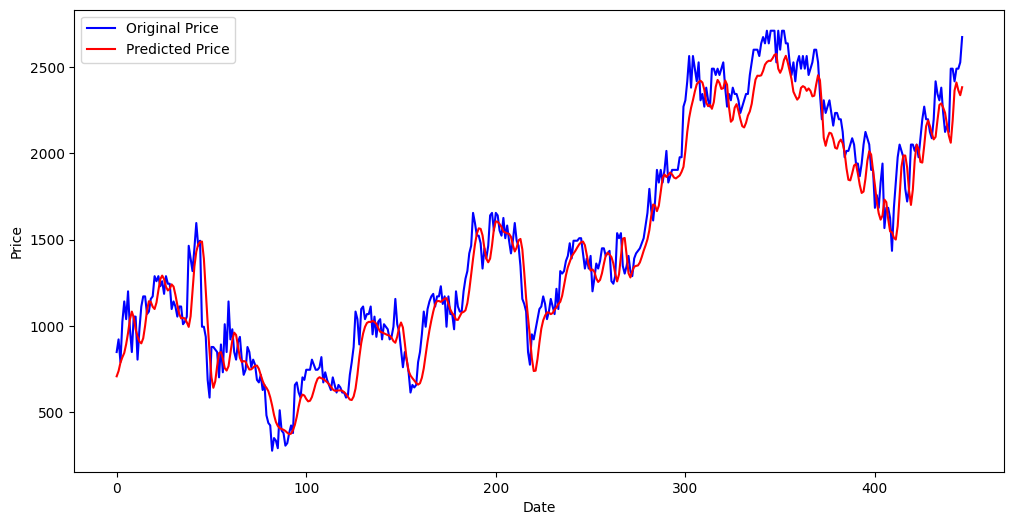

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()